In [2]:
import pandas as pd
import os
import numpy as np

In [12]:
pd.set_option('display.max_columns', None)

### Colunas importantes:
CO_IES: código único da IES

QT_INSCRITO_TOTAL: Quantidade total de inscritos

NU_ANO_CENSO: ano


In [ ]:
DATA_FOLTER = './data/censo/'

df_final = pd.DataFrame()
for filename in os.listdir(DATA_FOLTER):
    df = pd.read_csv(
        f"{DATA_FOLTER}/{filename}", sep=";", encoding="latin1"
    )

    df_ano = (
        df[["CO_IES", "QT_INSCRITO_TOTAL", "NU_ANO_CENSO"]]
        .groupby("CO_IES")
        .agg({"QT_INSCRITO_TOTAL": "sum", "NU_ANO_CENSO": "max"})
        .reset_index()
    )

    # compute
    tot_alunos = df_ano['QT_INSCRITO_TOTAL'].sum()
    mkt_share = df_ano['QT_INSCRITO_TOTAL'] / tot_alunos
    df_ano['mkt_share'] = mkt_share
    df_ano['hh'] = mkt_share ** 2
    df_ano['entropia_theil'] = mkt_share * np.abs(np.log(mkt_share))

    lim_sup_theil = np.log(len(df_ano))
    df_ano['entropia_theil_norm'] = mkt_share * np.abs(np.log(mkt_share))





    df_final = pd.concat([df_final, df_ano])

In [10]:
df_final[df_final['QT_INSCRITO_TOTAL'] > 0].sort_values('mkt_share').to_excel('medidas_de_concentracao_por_IES.xlsx', index=False)

Plotar

In [37]:
import matplotlib.pyplot as plt 

In [11]:
df = pd.read_excel('medidas_de_concentracao_por_IES.xlsx')

In [74]:
def find_cr(n, ano):
    return (
        sum(
            df[df["NU_ANO_CENSO"] == ano].sort_values("mkt_share", ascending=False)[
                "mkt_share"
            ][:n]
        )
        * 100
    )

In [75]:
df_g = df.groupby('NU_ANO_CENSO').sum(numeric_only=True)
anos = df_g.index

cr4 =[find_cr(4, ano) for ano in anos]
cr8 = [find_cr(8, ano) for ano in anos]
hh = df_g['hh'].apply(lambda x: x * 10000)
entropia_norm = df_g['entropia_theil_norm']

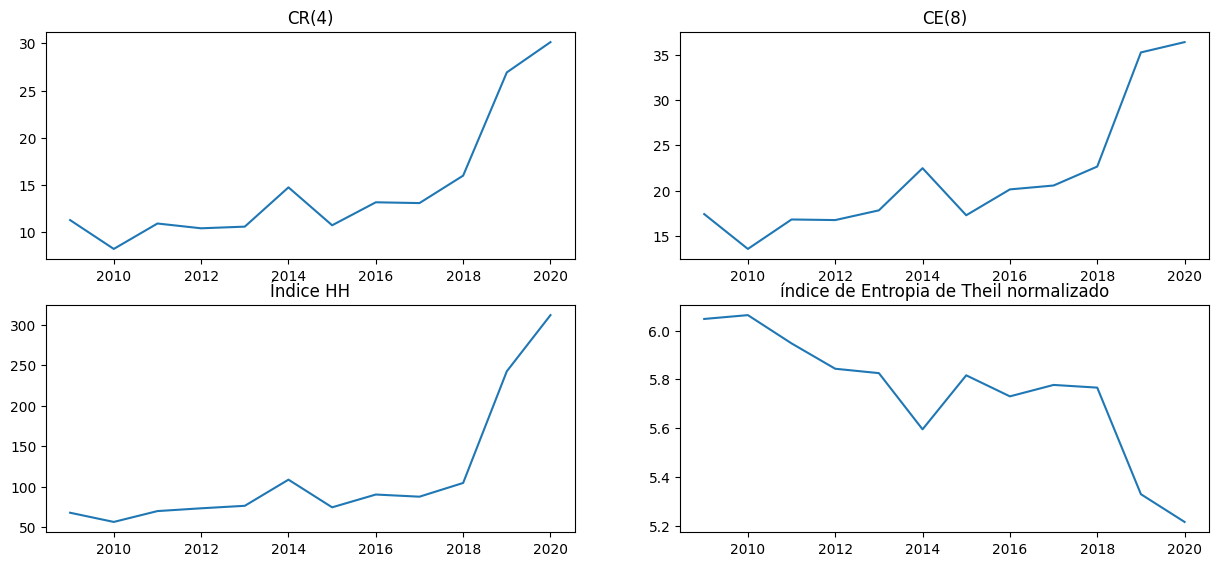

In [81]:
figure, axis = plt.subplots(2, 2, figsize=(15, 6.5))

axis[0, 0].plot(anos, cr4)
axis[0, 0].set_title("CR(4)")

axis[0, 1].plot(anos, cr8)
axis[0, 1].set_title("CE(8)")

axis[1, 0].plot(anos, hh.values)
axis[1, 0].set_title("Índice HH")

axis[1, 1].plot(anos, entropia_norm.values)
axis[1, 1].set_title("índice de Entropia de Theil normalizado")
plt.show()